<a href="https://colab.research.google.com/github/MaikarfiJesse/HouseP_MLModel/blob/main/HousePModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flask-ngrok
!pip install numpy pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np

# Assuming data is accessible via a direct link
url = '/content/sample_data/house_data.csv'
df = pd.read_csv(url)

# Selecting and engineering initial features
df['bed_bath_rooms'] = df['bedrooms'] * df['bathrooms']
df['years_since_built'] = 2020 - df['yr_built']  # Update the year accordingly

columns = ['bedrooms', 'bathrooms', 'floors', 'yr_built', 'bed_bath_rooms', 'years_since_built', 'price']
df = df[columns]

df.head()

,bedrooms,bathrooms,floors,yr_built,bed_bath_rooms,years_since_built,price
0,3,1.00,1.0,1955,3.00,65,221900.0
1,3,2.25,2.0,1951,6.75,69,538000.0
2,2,1.00,1.0,1933,2.00,87,180000.0
3,4,3.00,1.0,1965,12.00,55,604000.0
4,3,2.00,1.0,1987,6.00,33,510000.0


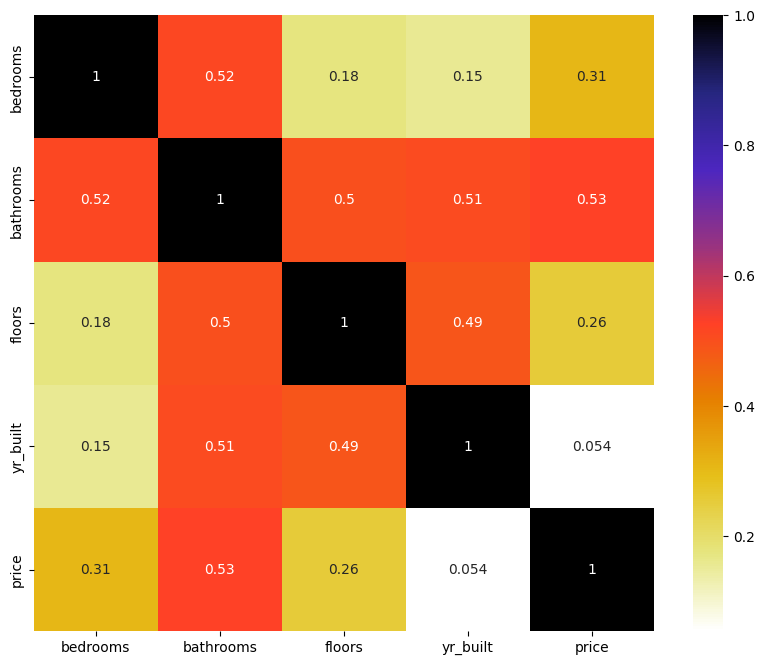

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# df.tail()

# df.columns

# df.isnull().sum()

df.info()

# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21613 non-null  int64  
 1   bathrooms          21613 non-null  float64
 2   floors             21613 non-null  float64
 3   yr_built           21613 non-null  int64  
 4   bed_bath_rooms     21613 non-null  float64
 5   years_since_built  21613 non-null  int64  
 6   price              21613 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


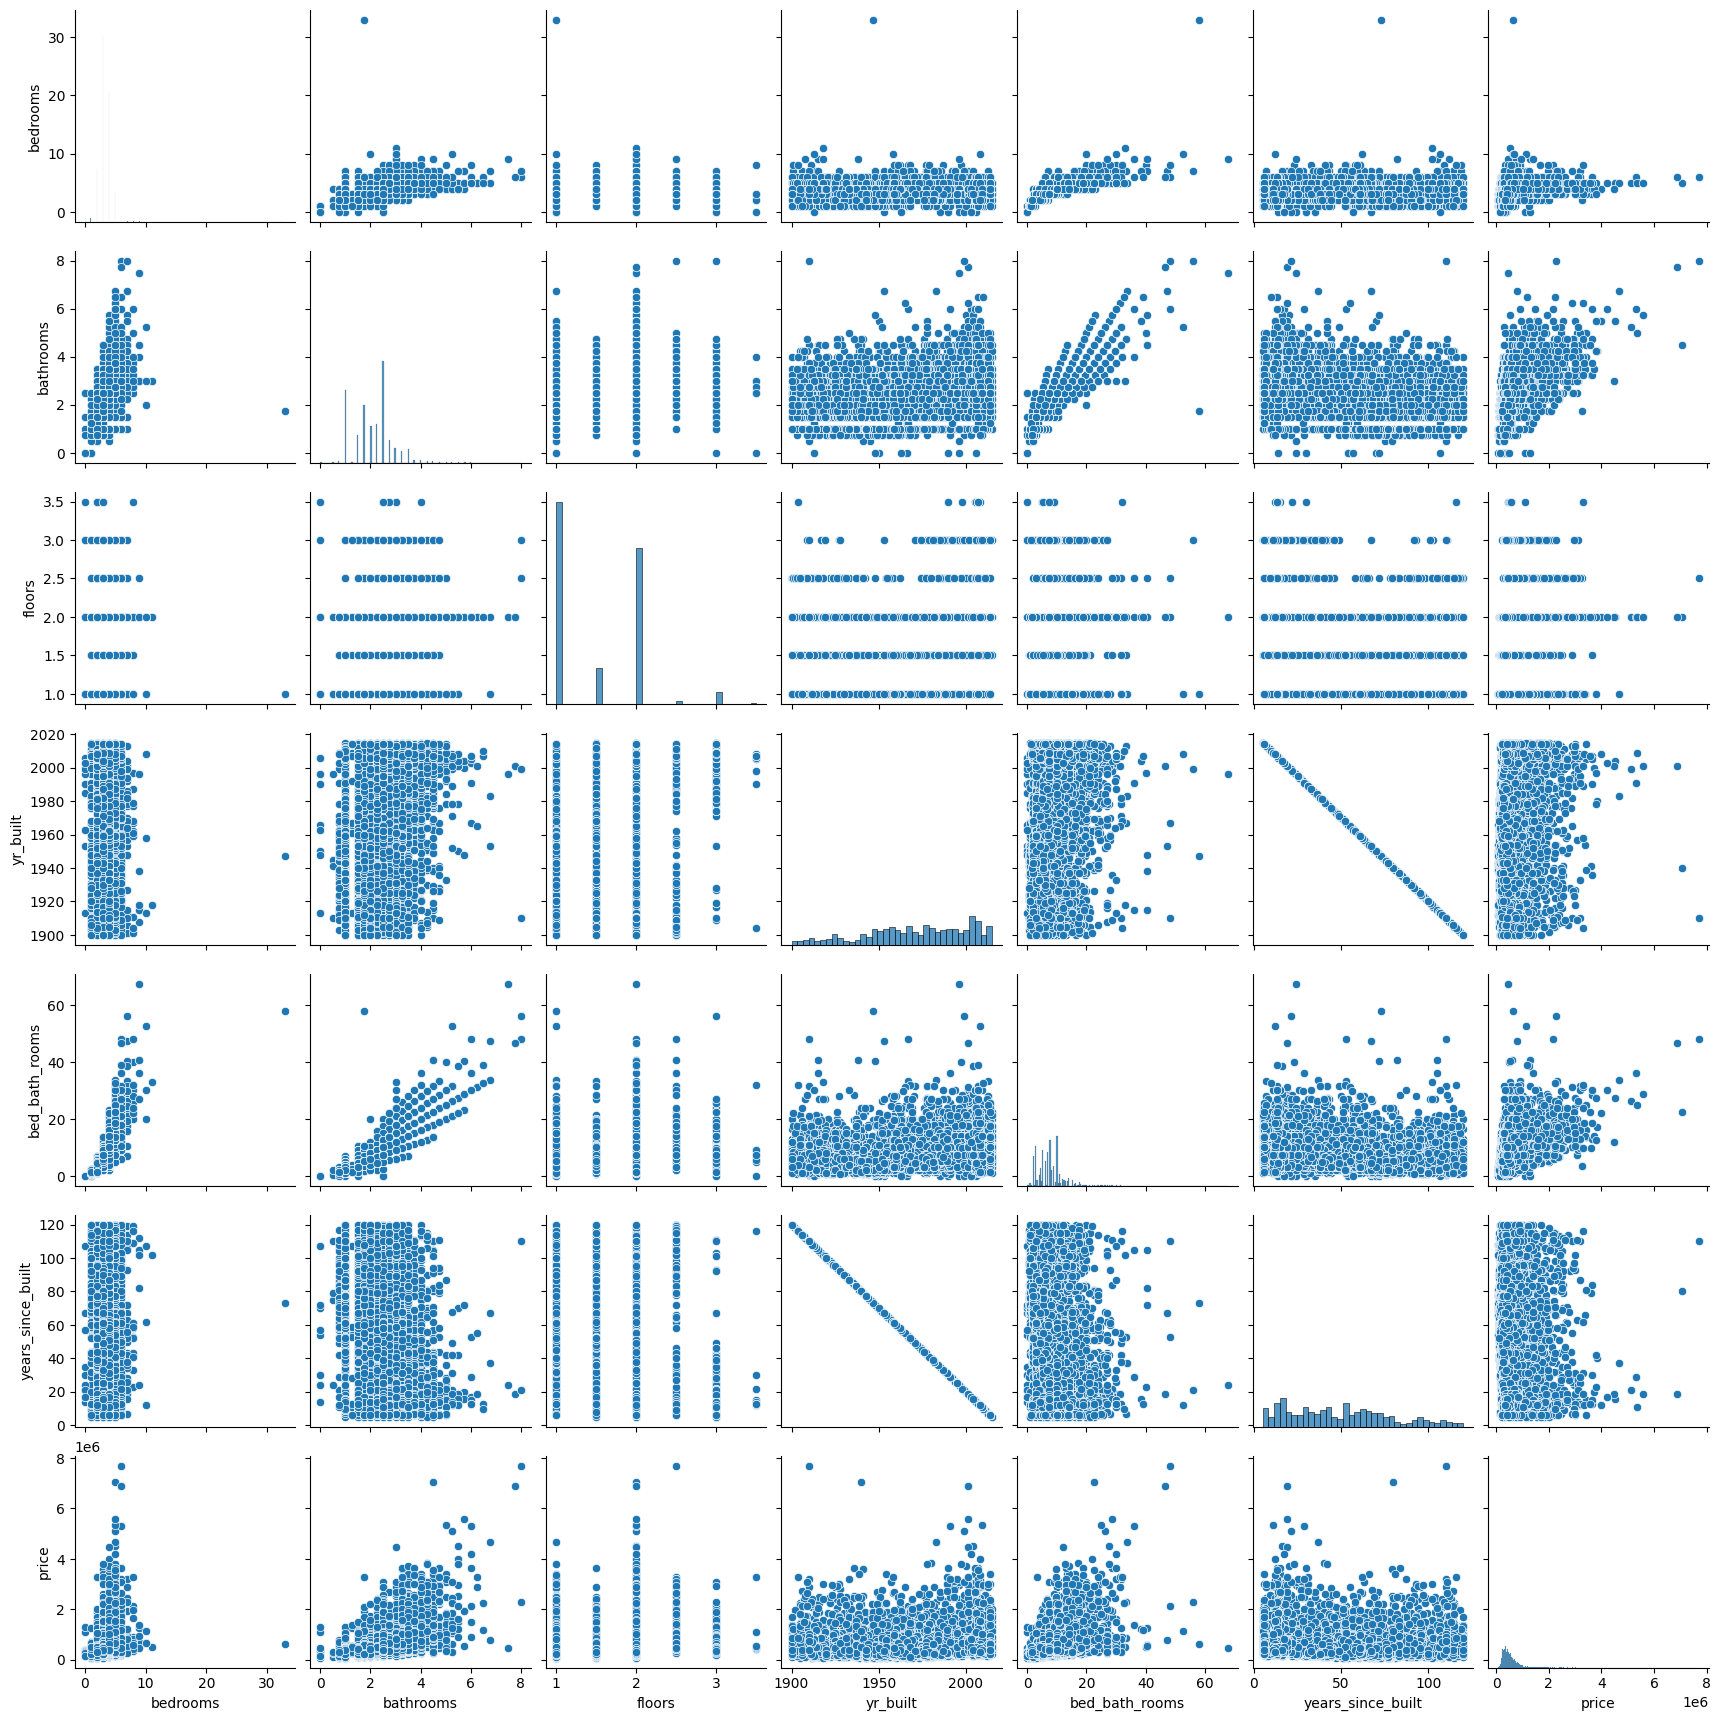

In [ ]:
column_vis = np.array(df.columns)
sns.pairplot(df[column_vis])

plt.show()

In [ ]:
lagos_df = df
# Determine percentiles
percentile_33 = lagos_df['price'].quantile(0.33)
percentile_66 = lagos_df['price'].quantile(0.66)

# Classify prices based on percentiles
lagos_df['price_class'] = pd.cut(lagos_df['price'], bins=[lagos_df['price'].min(), percentile_33, percentile_66, lagos_df['price'].max()], labels=['Cheap', 'Affordable', 'Expensive'])

# Print the counts of each class
print("Counts of each price class:")
print(lagos_df['price_class'].value_counts())


Counts of each price class:
price_class
Expensive     7296
Cheap         7225
Affordable    7091
Name: count, dtype: int64


In [ ]:
lagos_df.head()

,bedrooms,bathrooms,floors,yr_built,bed_bath_rooms,years_since_built,price,price_class
0,3,1.00,1.0,1955,3.00,65,221900.0,Cheap
1,3,2.25,2.0,1951,6.75,69,538000.0,Affordable
2,2,1.00,1.0,1933,2.00,87,180000.0,Cheap
3,4,3.00,1.0,1965,12.00,55,604000.0,Expensive
4,3,2.00,1.0,1987,6.00,33,510000.0,Affordable


In [ ]:
# Define mapping dictionary
class_mapping = {'Cheap': 0, 'Affordable': 1, 'Expensive': 2}

# Map values in the 'price_class' column using the mapping dictionary
lagos_df['price_class']= lagos_df['price_class'].map(class_mapping)

lagos_df.head()

,bedrooms,bathrooms,floors,yr_built,bed_bath_rooms,years_since_built,price,price_class
0,3,1.00,1.0,1955,3.00,65,221900.0,0
1,3,2.25,2.0,1951,6.75,69,538000.0,1
2,2,1.00,1.0,1933,2.00,87,180000.0,0
3,4,3.00,1.0,1965,12.00,55,604000.0,2
4,3,2.00,1.0,1987,6.00,33,510000.0,1


In [ ]:
# Separate features and target
X = lagos_df.iloc[:,:-1]#drop('price_class_encoded', axis=1)

y = lagos_df.iloc[:,-1:]

y = pd.get_dummies(y['price_class'], prefix='price_class')

X_columns_to_categories = ['bedrooms','bathrooms']

X = pd.get_dummies(X, columns = X_columns_to_categories)

In [ ]:
print(y.shape)

(21613, 3)


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_train[:0])

(17290, 48)
Empty DataFrame
Columns: [floors, yr_built, bed_bath_rooms, years_since_built, price, bedrooms_0, bedrooms_1, bedrooms_2, bedrooms_3, bedrooms_4, bedrooms_5, bedrooms_6, bedrooms_7, bedrooms_8, bedrooms_9, bedrooms_10, bedrooms_11, bedrooms_33, bathrooms_0.0, bathrooms_0.5, bathrooms_0.75, bathrooms_1.0, bathrooms_1.25, bathrooms_1.5, bathrooms_1.75, bathrooms_2.0, bathrooms_2.25, bathrooms_2.5, bathrooms_2.75, bathrooms_3.0, bathrooms_3.25, bathrooms_3.5, bathrooms_3.75, bathrooms_4.0, bathrooms_4.25, bathrooms_4.5, bathrooms_4.75, bathrooms_5.0, bathrooms_5.25, bathrooms_5.5, bathrooms_5.75, bathrooms_6.0, bathrooms_6.25, bathrooms_6.5, bathrooms_6.75, bathrooms_7.5, bathrooms_7.75, bathrooms_8.0]
Index: []

[0 rows x 48 columns]


In [ ]:
# Convert inputs to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
# Checking for NaN values
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

# Replace NaNs with the mean of the column if NaNs are present
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Ensure no infinite values
X_train = np.clip(X_train, a_min=-np.inf, a_max=np.inf)
X_test = np.clip(X_test, a_min=-np.inf, a_max=np.inf)
y_train = np.clip(y_train, a_min=-np.inf, a_max=np.inf)
y_test = np.clip(y_test, a_min=-np.inf, a_max=np.inf)

NaNs in X_train: floors               0
yr_built             0
bed_bath_rooms       0
years_since_built    0
price                0
bedrooms_0           0
bedrooms_1           0
bedrooms_2           0
bedrooms_3           0
bedrooms_4           0
bedrooms_5           0
bedrooms_6           0
bedrooms_7           0
bedrooms_8           0
bedrooms_9           0
bedrooms_10          0
bedrooms_11          0
bedrooms_33          0
bathrooms_0.0        0
bathrooms_0.5        0
bathrooms_0.75       0
bathrooms_1.0        0
bathrooms_1.25       0
bathrooms_1.5        0
bathrooms_1.75       0
bathrooms_2.0        0
bathrooms_2.25       0
bathrooms_2.5        0
bathrooms_2.75       0
bathrooms_3.0        0
bathrooms_3.25       0
bathrooms_3.5        0
bathrooms_3.75       0
bathrooms_4.0        0
bathrooms_4.25       0
bathrooms_4.5        0
bathrooms_4.75       0
bathrooms_5.0        0
bathrooms_5.25       0
bathrooms_5.5        0
bathrooms_5.75       0
bathrooms_6.0        0
bathrooms_6.25   

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Create the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(16, activation='relu'),  # Fourth hidden layer
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',  # MSE for regression
              metrics=['mae', 'mse'])

model.summary()

# Setup Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=48,
                    callbacks=[es])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               6272      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17153 (67.00 KB)
Trainable params: 17153 (67.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
361/36

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2  # Make sure this is included

# Create the model
model2 = Sequential([
    Dense(500, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),  # Regularization to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.25),  # Uncomment dropout layers if overfitting is observed
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),  # Regularize further to enhance generalization
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.3),  # Increase dropout rate as we deepen
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression with linear activation
])

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mean_squared_error',  # MSE for regression
              metrics=['mae', 'mse'])  # Tracking MAE and MSE as performance metrics

model2.summary()

# Setup Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)  # Stop training when no improvement in validation loss

# Train the model
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=42,
                    callbacks=[es])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 500)               24500     
                                                                 
 dense_36 (Dense)            (None, 256)               128256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 32)               

In [ ]:
# Evaluate the model on the test data
test_loss, test_mae, test_mse = model2.evaluate(X_test, y_test, verbose=2)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')

136/136 - 1s - loss: 0.2262 - mae: 0.4551 - mse: 0.2234 - 819ms/epoch - 6ms/step
Test Loss: 0.22617901861667633
Test MAE: 0.45509493350982666
Test MSE: 0.22335129976272583


In [ ]:
from sklearn.metrics import classification_report
# Make predictions
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# If y_test is a pandas DataFrame with a single target column, extract the Series
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]

# If y_test is a multi-dimensional NumPy array (possible one-hot encoding), convert to labels
if isinstance(y_test, np.ndarray) and y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_test, y_pred_class))

136/136 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.33      1.00      0.50      1447
           1       0.00      0.00      0.00      1383
           2       0.00      0.00      0.00      1493

    accuracy                           0.33      4323
   macro avg       0.11      0.33      0.17      4323
weighted avg       0.11      0.33      0.17      4323



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predictions
y_pred = model2.predict(X_test)
print(len(y_pred))
y_pred_class = np.argmax(y_pred, axis=1)
print(len(y_pred_class))

# If y_test is a pandas DataFrame with a single target column, extract the Series
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]

# If y_test is a multi-dimensional NumPy array (possible one-hot encoding), convert to labels
if isinstance(y_test, np.ndarray) and y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_test, y_pred_class))

136/136 [==============================] - 1s 6ms/step
4323
4323
              precision    recall  f1-score   support

           0       0.33      1.00      0.50      1447
           1       0.00      0.00      0.00      1383
           2       0.00      0.00      0.00      1493

    accuracy                           0.33      4323
   macro avg       0.11      0.33      0.17      4323
weighted avg       0.11      0.33      0.17      4323



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sample_input = np.array([[3, 2, 1, 1990, 2022 - 1990]]).astype('float32')
sample_input = np.pad(sample_input, ((0, 0), (0, model.input.shape[1] - 5)), 'constant')

predicted_sample_price = model.predict(sample_input)
print("Sample Predicted Price:", predicted_sample_price)

1/1 [==============================] - 0s 21ms/step
Sample Predicted Price: [[29.678314]]
